
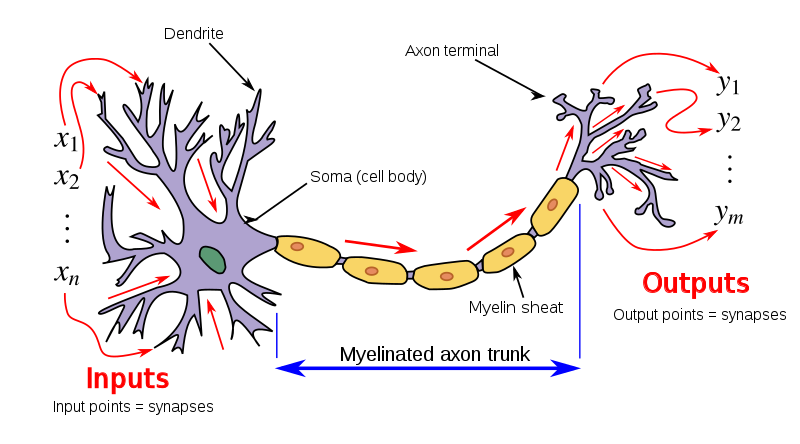

In [103]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [558]:
import numpy as np

class scalar:
    
    def __init__(self, data, label=None, parents=None, same_level=None):
        self.data = data
        self.gradient = 1.0
        self.label = label
        self.parents = parents
        self.same_level = None
        
    def __add__(self, other):
        other = other if isinstance(other, scalar) else scalar(other, str(other), None)
        other.same_level = self
        self.same_level = other
        out = scalar(self.data + other.data, f"{self.label}+{other.label}", parents=[self, '+', other]) 
        
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, scalar) else scalar(other, str(other), None)
        other.same_level = self
        self.same_level = other
        out = scalar(self.data*other.data, self.label + other.label, parents=[self, '*', other])        
        
        return out
    
    def __pow__(self, other):
        other = other if isinstance(other, scalar) else scalar(other, str(other), None)
        other.same_level = self
        self.same_level = other
        out = scalar(self.data**other.data, f"{self.label}^{other.label}", parents=[self, '**', other]) 
        
        return out
    
    def __repr__(self):
        return f"{self.data, self.gradient, self.label, [p.label if type(p) != str else p for p in self.parents] if self.parents != None else self.parents, self.same_level.label if self.same_level != None else self.same_level}"
        
    def back_propagate(self):
        if self.parents == None:
            return 
        
        elif self.parents[1] == '*':
            self.parents[0].gradient *= self.gradient * self.parents[2].data
            self.parents[2].gradient *= self.gradient * self.parents[0].data
            
            self.parents[0].back_propagate()
            self.parents[2].back_propagate()
            
        elif self.parents[1] == '**':
            self.parents[0].gradient *= self.gradient * self.parents[2].data * self.parents[0].data ** (self.parents[2].data-1)
            self.parents[2].gradient *= self.gradient * self.data * np.log(self.parents[0].data)
            
            self.parents[0].back_propagate()
            self.parents[2].back_propagate()
        
        elif self.parents[1] == '+':
            self.parents[0].gradient *= self.gradient
            self.parents[2].gradient *= self.gradient
            
            self.parents[0].back_propagate()
            self.parents[2].back_propagate()
            
    def wash(self):
        if self.parents == None:
            return
        
        self.parents[0].gradient = 1.0
        self.parents[0].wash()
        
        self.parents[2].gradient = 1.0
        self.parents[2].wash()
        
    def __neg__(self): 
        return self * -1

    def __radd__(self, other): 
        return self + other

    def __sub__(self, other): 
        return self + (-other)

    def __rsub__(self, other):
        return other + (-self)

    def __rmul__(self, other):
        return self * other

    def __truediv__(self, other):
        return self * other**-1

    def __rtruediv__(self, other):
        return other * self**-1
            

In [647]:
class neuron:
    
    def __init__(self, _func):
        self.b = scalar(random.uniform(0, 1), 'b')
        self._func = _func
        
    def activate(self):
        z = sum([x*w for x,w in zip(self.x, self.w)], self.b)
        return self._func(z)
    
    def feed(self, x):
        self.x = x
        self.w = [scalar(random.uniform(0, 1), f"w{_+1}") for _ in range(len(self.x))]
        
    def get_param(self):
        print(f"x : {[x.data for x in self.x]}\nweights : {[w.data for w in self.w]}\nbias : {self.b.data}")

In [648]:
# activation function choices

def identity(x):
    return x

def relu_function(x):
    if x<0:
        return 0
    else:
        return x 

In [663]:
# loss function choices

def rmse(true_y, pred_y):
    return (sum([(t-p)**2 for t,p in zip(true_y, pred_y)])/len(true_y))**0.5

def mse(true_y, pred_y):
    return sum([(t-p)**2 for t,p in zip(true_y, pred_y)])/len(true_y)

<ipython-input-558-f2dbcbfdd780>:52: RuntimeWarning: invalid value encountered in log
  self.parents[2].gradient *= self.gradient * self.data * np.log(self.parents[0].data)


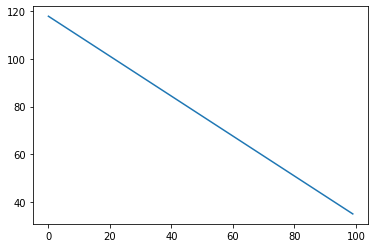

In [662]:
x1 = scalar(0.1, 'x1')
x2 = scalar(2.3, 'x2')
x3 = scalar(6.1, 'x3')
x4 = scalar(1.1, 'x4')
x5 = scalar(62.1, 'x5')
x6 = scalar(4.1, 'x6')
x7 = scalar(4.1, 'x7')
x8 = scalar(7.132, 'x8')
x9 = scalar(66.1, 'x9')

x = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
y = scalar(9, 'y')

MY_FIRST_EVER_NEURON = neuron(identity)
MY_FIRST_EVER_NEURON.feed(x)

py = MY_FIRST_EVER_NEURON.activate()

c = 0.0001
loss_history = []
loss = rmse

ys = [y]
pys = [py]

L = loss(ys, pys)

L.back_propagate()

for i in range(100):
    current_weights = MY_FIRST_EVER_NEURON.w
    
    new_weights = []
    
    for weight in current_weights:
        new_data = weight.data - c*weight.gradient
        new_weights.append(scalar(new_data, weight.label))
        
    
    MY_FIRST_EVER_NEURON.w = new_weights
    py = MY_FIRST_EVER_NEURON.activate()
    
    ys = [y]
    pys = [py]

    L = loss(ys, pys)
    loss_history.append(L.data)
    L.back_propagate()

plt.plot(loss_history)

### 1 multilayer perceptron takes 1 observation outputs 1 result!

In [124]:
# regular X
X = [
    [0.1, 2.24, 7.3],
    [1, 2.1, 6],
    [4, 1, 3]
]

X[0] # will be fed into MLP
w = [random.uniform(0, 1) for _ in range(len(X[0]))]
b = random.uniform(0, 1)

In [125]:
sum([_x*_w for _x,_w in zip(X[0], w)], b)

3.839873102239928

In [117]:
for x in zip(X[0], w):
    print(x)

(0.1, 0.8653026074863001)
(2.24, 0.18481982301688982)
(7.3, 0.6478549782686832)
